In [67]:
#Importing pandas and numpy
import pandas as pd
import numpy as np

#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [152]:
#Importing the data set
country = pd.read_csv("country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [69]:
#Data info
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [70]:
#As given in the data description, imports, exports and health are the percentage values of the GDP per capita
#So we first convert them to their actual values

In [153]:
country['imports']=country['imports']*country['gdpp']/100
country['exports']=country['exports']*country['gdpp']/100
country['health']=country['health']*country['gdpp']/100
country.head()



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# EDA

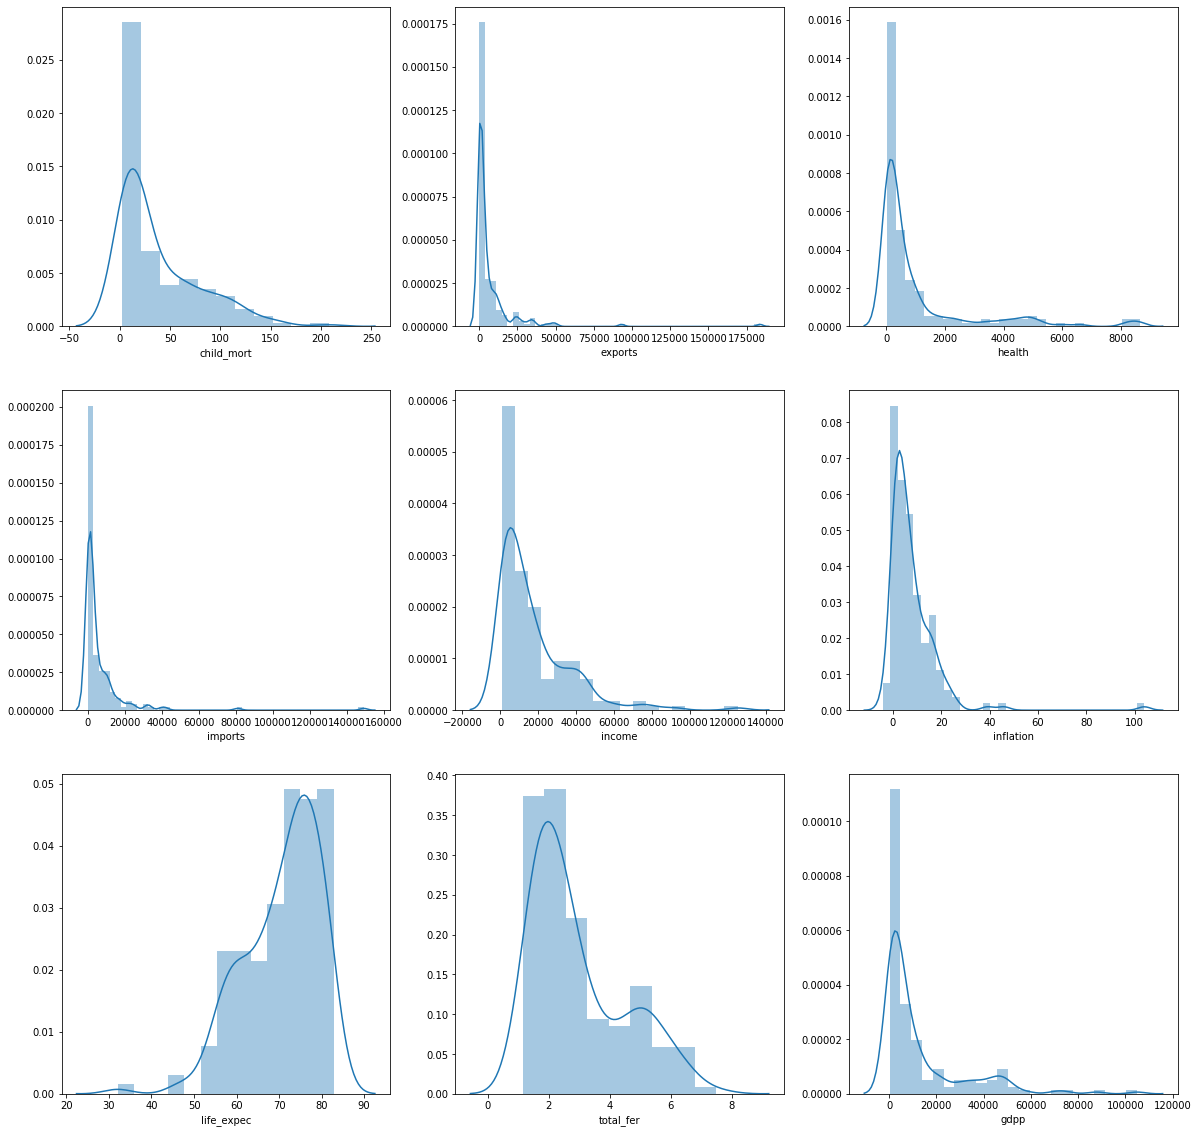

In [154]:
#Let us perform some EDA analysis to get a good idea about the data given
plt.figure(figsize = (20,20))
feature = country.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(country[i[1]])

<Figure size 1080x1080 with 0 Axes>

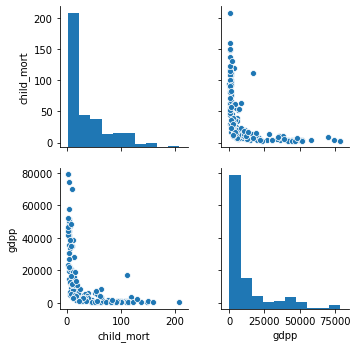

In [195]:
#child_mort vs gdpp
plt.figure(figsize = (15,15))
sns.pairplot(data = country, vars=['child_mort','gdpp'])

<Figure size 1080x1080 with 0 Axes>

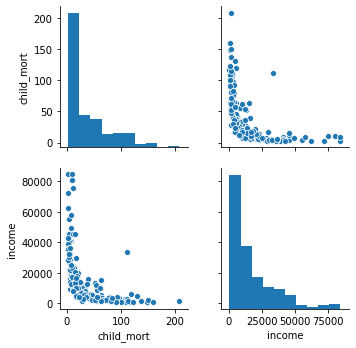

In [196]:
#child_mort vs income
plt.figure(figsize = (15,15))
sns.pairplot(data = country, vars=['child_mort','income'])

<Figure size 1080x1080 with 0 Axes>

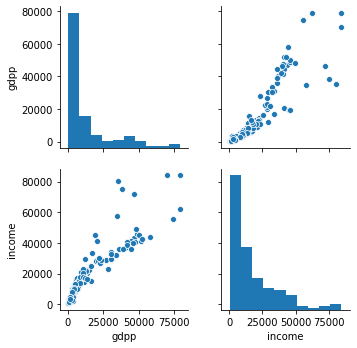

In [197]:
#gdpp vs income
plt.figure(figsize = (15,15))
sns.pairplot(data = country, vars=['gdpp','income'])

In [ ]:
# Now using boxplots let us do the univariate analysis of the dataset and in turn see if there are any outliers in each of the columns


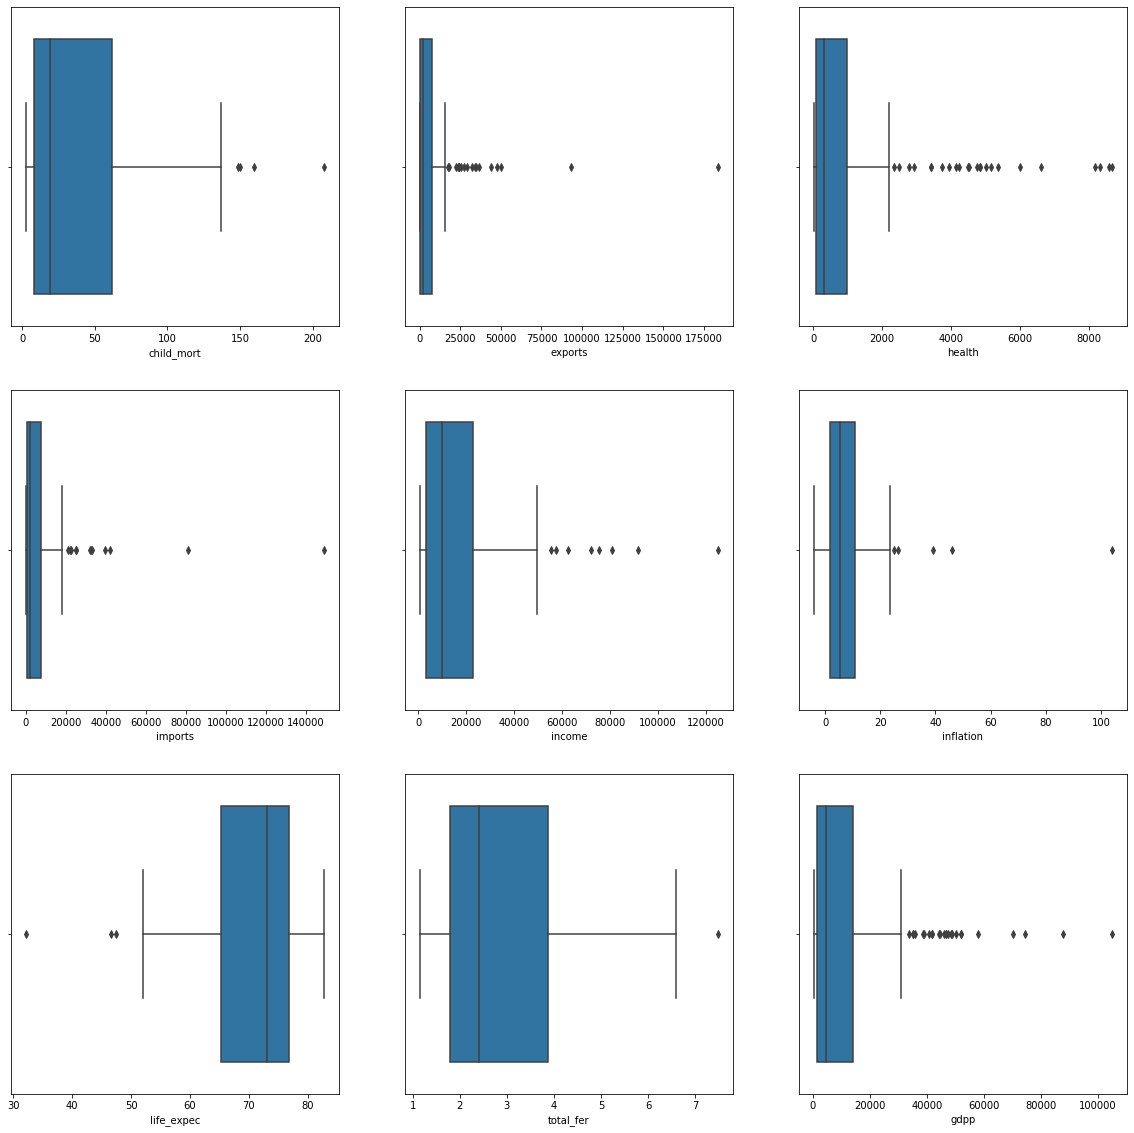

In [155]:
plt.figure(figsize = (20,20))
feature = country.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(country[i[1]])

In [ ]:
#Outlier Analysis

In [ ]:
#From the above plots, we can see that there are some outliers
#Now what we can do is to cap these outliers
#We know that if the child mortalility rate is high, these countries are in need of help. Hence we cap the lower range outliers.
# For the rest of the columns, we cap the higher range only. This is because if we cap the lower range, we might lose countries that are in need of help.

In [156]:
#Capping Outliers
#1.child_mort (Capping of lower range)
q1 = country['child_mort'].quantile(0.01) 
country['child_mort'][country['child_mort']<=q1] = q1  


In [157]:
#For the rest of the columns, we will be capping the higher range 
q2 = country['exports'].quantile(0.99)
country['exports'][country['exports']>=q2] = q2
q3= country['health'].quantile(0.99)
country['health'][country['health']>=q3] = q3
q4 = country['imports'].quantile(0.99)
country['imports'][country['imports']>=q4] = q4
q5 = country['income'].quantile(0.99)
country['income'][country['income']>=q5] = q5
q6 = country['inflation'].quantile(0.99)
country['inflation'][country['inflation']>=q6] = q6
q7 = country['total_fer'].quantile(0.99)
country['total_fer'][country['total_fer']>=q7] = q7
q8 = country['gdpp'].quantile(0.99)
country['gdpp'][country['gdpp']>=q8] = q8                   
                   

In [158]:
# Check the hopkins

#Calculating the Hopkins statistic

 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [200]:
hopkins(country.drop('country', axis = 1))

0.8743511787620633

In [199]:
#hopkins value greater than 80% is considered as ideal, which is the case here

In [160]:
#Next, let us do scaling of the data   

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
country1 = scaler.fit_transform(country.drop('country', axis = 1))
country1

array([[ 1.29153663, -0.56962212, -0.56695778, ..., -1.61909203,
         1.92639646, -0.70225949],
       [-0.53899289, -0.47385792, -0.4403934 , ...,  0.64786643,
        -0.86505432, -0.49872564],
       [-0.27286971, -0.42399973, -0.48627082, ...,  0.67042323,
        -0.03498262, -0.47743428],
       ...,
       [-0.37235501, -0.49160668, -0.54024972, ...,  0.28695762,
        -0.66423052, -0.65869853],
       [ 0.44839871, -0.53995007, -0.55242911, ..., -0.34463279,
         1.15657191, -0.65869853],
       [ 1.11495022, -0.52701632, -0.54227159, ..., -2.09278484,
         1.64524315, -0.6500669 ]])

In [162]:
#Converting the above to a dataframe,
country1 = pd.DataFrame(country1, columns = country.columns[1:])
country1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


In [163]:
#K-Mean Clustering

In [164]:
#Now we need to find out the number of clusters or the value of k


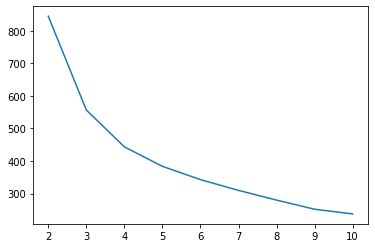

In [165]:
#1. Elbow curve/ SSD
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

In [ ]:
#From the above plot, the elbow is formed at 3 and 4
#We will select 3 out of both, as the rule being to select the smaller value

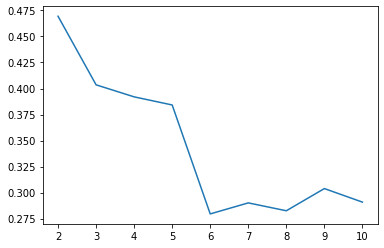

In [166]:
#2. Silhouette score
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country1)
    ss.append([k, silhouette_score(country1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

In [ ]:
#Here, as seen in the plot, the rule is to select the cluster with the highest value, which means 2 in this case
#However, considering 2 to be the optimal number of clusters would mean, that we are basically dividing the data to 2 halfs and this is not right
#Hence, we will go with 3 clusters

In [167]:
# Therefore, from both elbow curve and silhouette score, we get K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(country1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [168]:
#Copying the dataframe
df_kmean = country.copy()

In [169]:
#Now let us append label column to the original dataframe
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,1
1,2
2,2
3,1
4,2


In [170]:
#Concatinating both the dataframes
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [171]:
#Lets check how mnay observations are there under each cluster
df_kmean.label.value_counts()

2    90
1    48
0    29
Name: label, dtype: int64

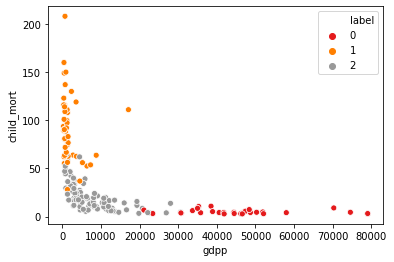

In [172]:
# Plot the cluster
#1. GDP and child_mort
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')

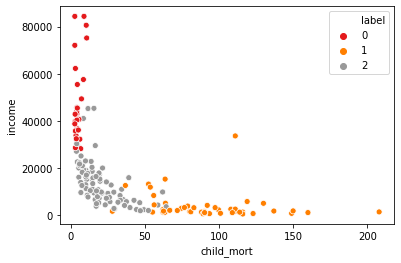

In [173]:
#2.child_mort and income
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

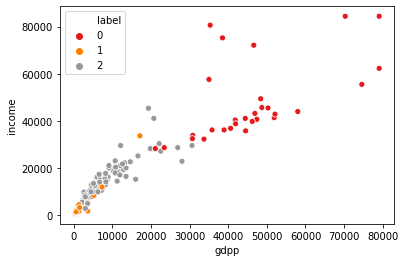

In [174]:
#3.gdpp and income
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

In [130]:
#Cluster Profiling

In [131]:
#Cluster profiling will be done on the original dataframe and not on the scaled dataframe

<Figure size 1440x1440 with 0 Axes>

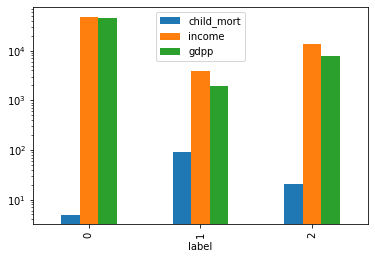

In [202]:
plt.figure(figsize = (20,20))
df_kmean.drop(["country","exports","health","imports","inflation","life_expec","total_fer"], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.yscale("log")
plt.show()

In [ ]:
#We scale the y axis to log so that child_mort is visible in the graph

In [203]:
#here we are looking at the cluster where the income and gdp is low and child mortality is high, which is label=1
# Filter the data for that clsuter

df_kmean[df_kmean['label'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,1
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,1
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,1
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,1
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,1
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,1
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,1


In [177]:
#Now getting the top 5 countries wiht low income and gdpp, and high child mortality
df_kmean[df_kmean['label'] == 1].sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,1
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,1


# Hierarchical Clustering

In [178]:
country1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


In [179]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
#Firstly, we will look at the plots of both single linkage and complete linkage, in order to finf out the number of clusters to be chosen

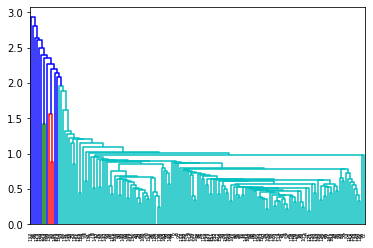

In [208]:
# single linkage
#plt.figure(figsize = (20,20))
mergings = linkage(country1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
#As we can see, single linkage is very hard to interpret

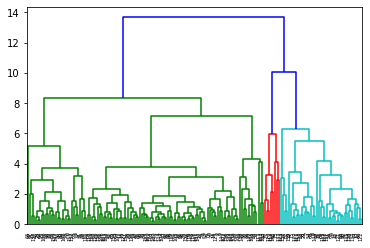

In [209]:
# complete linkage
#plt.figure(figsize = (20,10))
mergings = linkage(country1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [182]:
#Since we get a clearer picture from complete linkage, we can draw a horizontal line at 10 and consider the number of clusters to be 3
# 3 clusters
labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [183]:
#Copying the dataframe
df_hie = country.copy()

In [184]:
#Assigning cluster labels
df_hie['labels'] = labels
df_hie.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


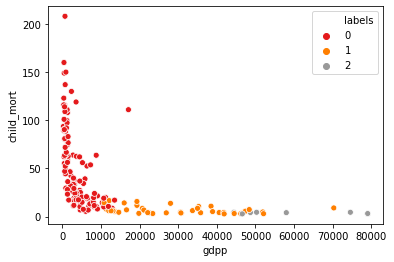

In [185]:
#plotting the cluster
#1. GDP and child_mort
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'labels', data = df_hie, palette = 'Set1')

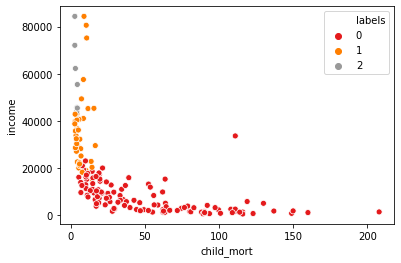

In [186]:
#2.child_mort and income
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'labels', data = df_hie, palette = 'Set1')

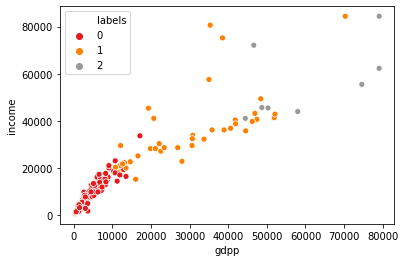

In [187]:
#3.gdpp and income
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'labels', data = df_hie, palette = 'Set1')

# Cluster Profiling 

<Figure size 1440x1440 with 0 Axes>

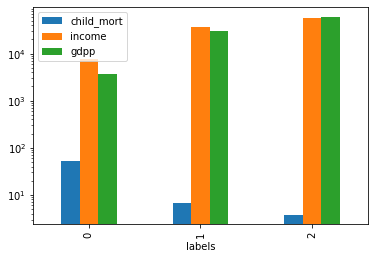

In [204]:
plt.figure(figsize = (20,20))
df_hie.drop(["country","exports","health","imports","inflation","life_expec","total_fer"], axis = 1).groupby('labels').mean().plot(kind = 'bar')
plt.yscale("log")
plt.show()

In [189]:
#here we are looking at the cluster where the income and gdp is low and child mortality is high, which is label=0
# Filter the data for that clsuter

df_hie[df_hie['labels'] == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0,0


In [191]:
#getting the top 5 countries with low income and gdp, and high child mortality
df_hie[df_hie['labels'] == 0].sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0


In [ ]:
#As we can see from both k-means and hierarchical clustering, the countries that have low income, low GDP and high Child mortality are:
#1. Burundi
#2. Liberia
#3. Congo Dem. Rep.
#4. Niger
#5. Sierra Leone

In [ ]:
#In all of the above mentioned countries, 

#1. child mortality per 100 births is between 90 and 160
#     In comparison to other countries like singapore with 2.8 per 1000 and US with 5.8 per 1000, shows that the mentioned 
#     5 countries have a high chilf mortality

#2. Similarly comparing the net income per person, it is between 750-1200, which is again very low when compared to other countries
#    whose income lies between 20000 to 75000

#3. Looking at the GDP of the above mnetioned countries, = between 200 and 400
#   Comparing with other countries, GDP is between 12000 and 80000
# Which again shows the mentioned countries have very less GDP

#4. We can also look at life expentency, which is between 55 and 60 
# Other countries life expentancy ranges anywhere between 75 and 80


In [207]:
#Therefore, the countries which the CEO needs to focus on the most should be:
#1. Burundi
#2. Liberia
#3. Congo Dem. Rep.
#4. Niger
#5. Sierra Leone